In [2]:
#Import the time library and the datetime moduule from the datetime library
import numpy as np
import pandas as pd
import time
import requests
import random
import csv
from config import weather_api_key
from citipy import citipy
from datetime import datetime


In [3]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=fe24c81b79105e335cd320446ce01778


In [4]:
city_url = url + "&q=" + "Boston"
print(city_url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=fe24c81b79105e335cd320446ce01778&q=Boston


In [5]:
# Create a practice set of random latitude and longitude combinations.
lats = np.random.uniform(-90, 90, size = 1500)
lngs = np.random.uniform(low =-180, high = 180, size = 1500)
lat_lngs = zip(lats, lngs)

In [6]:
coordinates = list(lat_lngs)

In [7]:
#Create a list for holding the cities
cities = []

for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    
    if city not in cities:
        cities.append(city)
#Print the city count to confirm sufficient count

len(cities)

598

In [8]:
#create an empty list to hold the weather data
city_data= []

# EPrint the beginning of the logging
print("Beginning Data Retrieval     ")
print("-----------------------------")


#create counters

record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [9]:
#Loop through all the cities in our list
for i, city in enumerate(cities):
    
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)
        
    #Create endpoint URL with each city
    
    city_url = url + "&q=" + city.replace(" ", "+")
    
    
    #Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    #Add 1 to the record count.
    
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
    pass

    # Indicate that Data Loading is complete.
    print("-----------------------------")
    print("Data Retrieval Complete      ")
    print("-----------------------------")



Processing Record 1 of Set 1 | dicabisagan
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 2 of Set 1 | dwarka
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 3 of Set 1 | puerto ayora
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 4 of Set 1 | bocas del toro
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 5 of Set 1 | ribeira grande
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 6 of Set 1 | barentsburg
City not found. Skipping...
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 7 of Set 1 | kapaa
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 8 of Set 1 | illoqqortoormi

-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 13 of Set 2 | yellowknife
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 14 of Set 2 | cockburn town
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 15 of Set 2 | dolores
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 16 of Set 2 | vostok
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 17 of Set 2 | meadow lake
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 18 of Set 2 | mys shmidta
City not found. Skipping...
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 19 of Set 2 | barra do garcas
-----------------------------
Data Re

-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 25 of Set 3 | guerrero negro
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 26 of Set 3 | marsh harbour
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 27 of Set 3 | jalu
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 28 of Set 3 | hobyo
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 29 of Set 3 | kodiak
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 30 of Set 3 | hambantota
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 31 of Set 3 | arraial do cabo
-----------------------------
Data Retrieval Complete      
------------

-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 37 of Set 4 | svetlogorsk
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 38 of Set 4 | lorengau
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 39 of Set 4 | labuhan
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 40 of Set 4 | asyut
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 41 of Set 4 | talnakh
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 42 of Set 4 | rio cuarto
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 43 of Set 4 | tucupita
-----------------------------
Data Retrieval Complete      
-----------------------

-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 50 of Set 5 | dzaoudzi
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 1 of Set 6 | upernavik
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 2 of Set 6 | lagunas
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 3 of Set 6 | tsihombe
City not found. Skipping...
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 4 of Set 6 | te anau
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 5 of Set 6 | okhotsk
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 6 of Set 6 | sao filipe
-----------------------------
Data Retrieval Complete      
-

-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 12 of Set 7 | wanning
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 13 of Set 7 | ajdabiya
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 14 of Set 7 | temaraia
City not found. Skipping...
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 15 of Set 7 | ovsyanka
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 16 of Set 7 | puerto escondido
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 17 of Set 7 | bairiki
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 18 of Set 7 | briancon
-----------------------------
Data Retrieval Comp

City not found. Skipping...
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 25 of Set 8 | severo-kurilsk
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 26 of Set 8 | faya
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 27 of Set 8 | poum
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 28 of Set 8 | andevoranto
City not found. Skipping...
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 29 of Set 8 | syamzha
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 30 of Set 8 | presidente olegario
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 31 of Set 8 | tautira
-----------------

-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 36 of Set 9 | graciano sanchez
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 37 of Set 9 | rio grande
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 38 of Set 9 | tateyama
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 39 of Set 9 | mnogovershinnyy
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 40 of Set 9 | maler kotla
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 41 of Set 9 | qaqortoq
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 42 of Set 9 | pascagoula
-----------------------------
Data Retrieval Complete      
-

-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 49 of Set 10 | marcona
City not found. Skipping...
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 50 of Set 10 | annau
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 1 of Set 11 | touros
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 2 of Set 11 | grindavik
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 3 of Set 11 | sumbe
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 4 of Set 11 | chuy
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 5 of Set 11 | anacortes
-----------------------------
Data Retrieval Complete      
----

-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 11 of Set 12 | angoche
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 12 of Set 12 | vetlanda
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 13 of Set 12 | thunder bay
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 14 of Set 12 | abu kamal
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 15 of Set 12 | sholokhovskiy
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 16 of Set 12 | mount gambier
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 17 of Set 12 | vamdrup
-----------------------------
Data Retrieval Complete      
----

In [10]:
city_data

[{'City': 'Dicabisagan',
  'Lat': 17.0818,
  'Lng': 122.4157,
  'Max Temp': 85.75,
  'Humidity': 70,
  'Cloudiness': 68,
  'Wind Speed': 6.06,
  'Country': 'PH',
  'Date': '2022-10-04 04:03:24'},
 {'City': 'Dwarka',
  'Lat': 22.2394,
  'Lng': 68.9678,
  'Max Temp': 82.2,
  'Humidity': 66,
  'Cloudiness': 31,
  'Wind Speed': 3.71,
  'Country': 'IN',
  'Date': '2022-10-04 04:07:39'},
 {'City': 'Puerto Ayora',
  'Lat': -0.7393,
  'Lng': -90.3518,
  'Max Temp': 65.55,
  'Humidity': 94,
  'Cloudiness': 41,
  'Wind Speed': 4,
  'Country': 'EC',
  'Date': '2022-10-04 03:58:18'},
 {'City': 'Bocas Del Toro',
  'Lat': 9.3333,
  'Lng': -82.25,
  'Max Temp': 80.67,
  'Humidity': 82,
  'Cloudiness': 83,
  'Wind Speed': 5.64,
  'Country': 'PA',
  'Date': '2022-10-04 04:08:01'},
 {'City': 'Ribeira Grande',
  'Lat': 38.5167,
  'Lng': -28.7,
  'Max Temp': 69.35,
  'Humidity': 82,
  'Cloudiness': 91,
  'Wind Speed': 2.24,
  'Country': 'PT',
  'Date': '2022-10-04 04:06:56'},
 {'City': 'Kapaa',
  'Lat': 2

In [5]:
import pandas as pd
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

NameError: name 'city_data' is not defined

In [3]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head()



NameError: name 'city_data_df' is not defined

In [2]:
#Create the output file (CSV)
output_data_file = "weather_data/cities.csv"

# Export the city_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label = "City_ID")

NameError: name 'city_data_df' is not defined

In [6]:
#Extract relevant field from the DataFrame for plotting.
city_data = "weather_data/cities.csv"
city_data_df = pd.read_csv(city_data)

lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [7]:
#Import the time module
import time
#Get today's date in seconds.

today = time.strftime("%x")
today

'10/04/22'

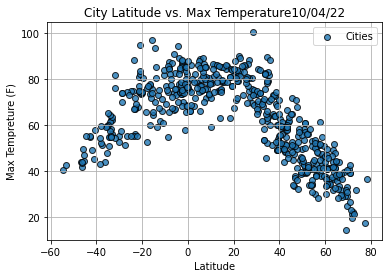

<Figure size 432x288 with 0 Axes>

In [8]:
#Build the scatter plot for latitude vs.max tempreture
import matplotlib.pyplot as plt

plt.scatter(lats, max_temps, edgecolor = "black", linewidths = 1, marker = "o", alpha = 0.8, label = "Cities")
plt.title(f"City Latitude vs. Max Temperature"+ time.strftime("%x"))
plt.ylabel("Max Tempreture (F)")
plt.xlabel("Latitude")
plt.grid()

plt.legend()
plt.show()
plt.savefig("weather_data/fig1.png")

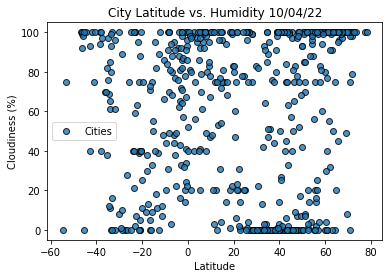

<Figure size 432x288 with 0 Axes>

In [9]:
#Build the scatter plots for latitude vs. humidity

plt.scatter(lats, cloudiness, edgecolor = "black", 
            linewidths = 1, marker = "o", alpha = 0.8, 
            label = "Cities")

plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.legend()
plt.show()

plt.savefig("weather_data/Fig3.png")



AttributeError: module 'matplotlib.pyplot' has no attribute 'xtitle'

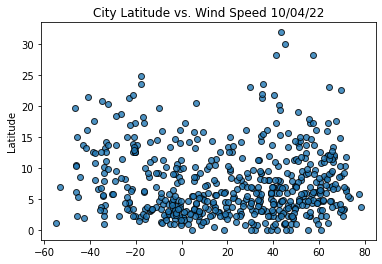

In [18]:
#Build the scatter plots for latitude vs. wind speed

plt.scatter(lats, wind_speed, linewidths = 1, marker = "o", alpha = 0.8, label = "Cities",
           edgecolor = "black")
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Latitude")
plt.xtitle("Wind Speed (mph)")
plt.grid()

Text(0, 0.5, 'Max Tempreture (F)')

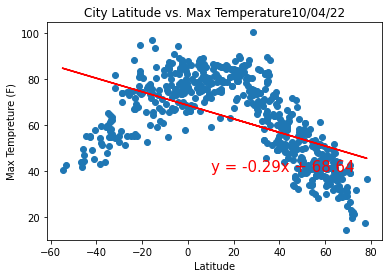

In [19]:
#Perform linear regression
from scipy.stats import linregress
(slope, intercept, r_value, p_value, std_err) = linregress(lats, max_temps )

#Calculate the regression line "y values" from the slope and intecept

regress_values = lats * slope + intercept

#Get the equation of the line
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

#Create a scatter plot of the x and y values

plt.scatter(lats, max_temps)

#Plot the regression line with the x-values and the y coordinates based on the intercept and slope

plt.plot(lats, regress_values, "r")

#Annotate the text for the line equation and add its coordinates

plt.annotate(line_eq, (10,40), fontsize=15, color = "red")

plt.title(f"City Latitude vs. Max Temperature"+ time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Max Tempreture (F)")



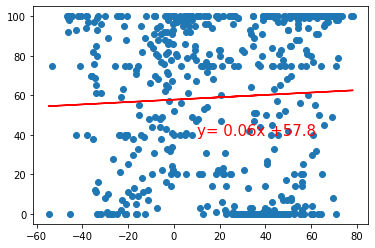

In [20]:
(slope, intercept, r_value, p_value, std_err) = linregress(lats, cloudiness)

regress_value = slope * lats + intercept

#Get the equation of the line

line_eq = "y= " + str(round(slope,2)) + "x +" + str(round(intercept,2))

line_eq

plt.scatter(lats, cloudiness)

plt.plot(lats, regress_value, "r")

plt.annotate(line_eq, (10,40), color = "red", fontsize = 15)

plt.show()


Text(10, 40, 'y = -0.03x + 73.89')

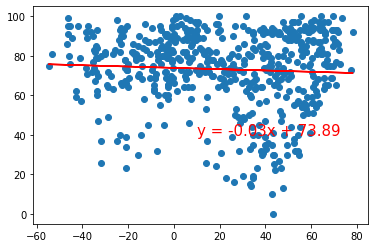

In [21]:
(slope, intercept, r_value, p_value, std_err) = linregress(lats, humidity)

regress_value = slope * lats + intercept

line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

line_eq

plt.scatter(lats, humidity)
plt.plot(lats, regress_value, "r")
plt.annotate(line_eq, (10,40), color = "red", fontsize = 15)

In [22]:
index13 = city_data_df.loc[13]
index13

City_ID                        13
City                Moose Factory
Country                        CA
Date          2022-10-04 03:59:34
Lat                       51.2585
Lng                      -80.6094
Max Temp                     60.8
Humidity                       88
Cloudiness                    100
Wind Speed                   4.61
Name: 13, dtype: object

In [23]:
city_data_df["Lat"] >= 0

0       True
1       True
2      False
3       True
4       True
       ...  
550     True
551     True
552     True
553     True
554     True
Name: Lat, Length: 555, dtype: bool

In [24]:
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]
northern_hemi_df

,City_ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,0,Dicabisagan,PH,2022-10-04 04:03:24,17.0818,122.4157,85.75,70,68,6.06
1,1,Dwarka,IN,2022-10-04 04:07:39,22.2394,68.9678,82.20,66,31,3.71
3,3,Bocas Del Toro,PA,2022-10-04 04:08:01,9.3333,-82.2500,80.67,82,83,5.64
4,4,Ribeira Grande,PT,2022-10-04 04:06:56,38.5167,-28.7000,69.35,82,91,2.24
5,5,Kapaa,US,2022-10-04 04:08:02,22.0752,-159.3190,79.12,72,20,12.66
...,...,...,...,...,...,...,...,...,...,...
550,550,Bulaevo,KZ,2022-10-04 04:22:11,54.9056,70.4439,41.04,44,56,9.82
551,551,Ossora,RU,2022-10-04 04:22:12,59.2353,163.0719,41.49,75,99,4.29
552,552,Adrar,MR,2022-10-04 04:22:12,20.5022,-10.0711,87.69,31,60,10.36
553,553,Eureka,US,2022-10-04 04:22:13,40.8021,-124.1637,59.67,85,25,1.01


In [25]:
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

southern_hemi_df

,City_ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
2,2,Puerto Ayora,EC,2022-10-04 03:58:18,-0.7393,-90.3518,65.55,94,41,4.00
6,6,Mahebourg,MU,2022-10-04 04:07:33,-20.4081,57.7000,74.25,73,40,12.66
7,7,Port Alfred,ZA,2022-10-04 04:08:03,-33.5906,26.8910,58.17,84,80,4.00
8,8,Hithadhoo,MV,2022-10-04 04:07:06,-0.6000,73.0833,82.35,69,93,16.08
10,10,Ushuaia,AR,2022-10-04 04:06:54,-54.8000,-68.3000,40.66,75,0,1.14
...,...,...,...,...,...,...,...,...,...,...
532,532,Kismayo,SO,2022-10-04 04:22:04,-0.3582,42.5454,76.68,82,22,11.34
535,535,Kawalu,ID,2022-10-04 04:22:05,-7.3817,108.2082,79.90,82,94,4.83
536,536,Belmonte,BR,2022-10-04 04:22:06,-15.8631,-38.8828,74.14,85,33,9.98
540,540,Richards Bay,ZA,2022-10-04 04:22:08,-28.7830,32.0377,70.09,72,89,13.67


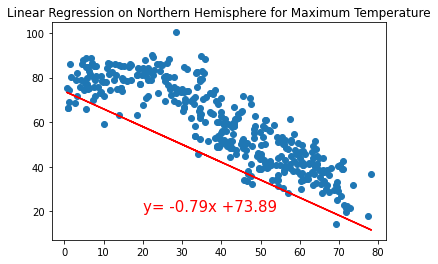

In [26]:
# Linear regression on the Northern Hemisphere
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

(slope, intecept, r_value, p_value, std_err) = linregress(x_values, y_values)
regress_value = slope * x_values + intercept
line_eq = "y= " + str(round(slope, 2)) + "x +" + str(round(intercept, 2))

# Call the function.
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_value, "r")
plt.annotate(line_eq, (20, 20), color = "red", fontsize = 15)
plt.title("Linear Regression on Northern Hemisphere for Maximum Temperature")
plt.show()

In [27]:
def plot_linear_regression(x_vlaues, y_values, title, y_label, text_coordinates):
    #create a function to create perform linear regression on the weather data
    # and plot a regression line and the equation with the data
    (slope, intercept, r_values, p_values, std_err) = linregress(x_values, y_values)
    #Calculate the regressionline "y values" from the slope and intercept
    regress_values = slope* x_values + intercept
    #Get the equation of the list
    line_eq = "y= " + str(round(slope,2)) + "x +" + str(round(intercept, 2))
    #Create a scatter plot
    plt.scatter(x_values, y_values)
    #create a plot
    plt.plot(x_values, regress_values, "r")
    #Annotate the text for the line equation
    plt.annotate(line_eq, text_coordinates, color = "red", fontsize = 15)
    plt.title(title)
    plt.xlabel("Latitude")
    plt.ylabel(y_label)
    
    plt.show()

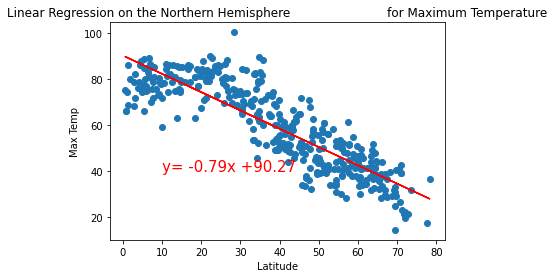

In [28]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

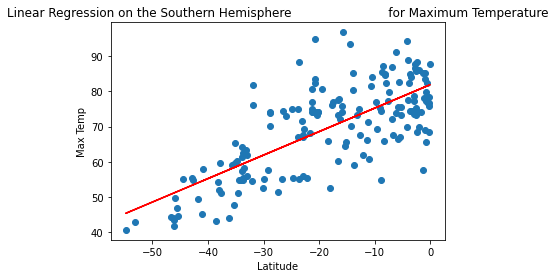

In [29]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

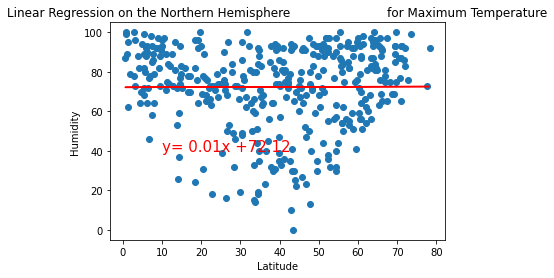

In [32]:
#Linear regression on the northern hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Humidity',(10,40))

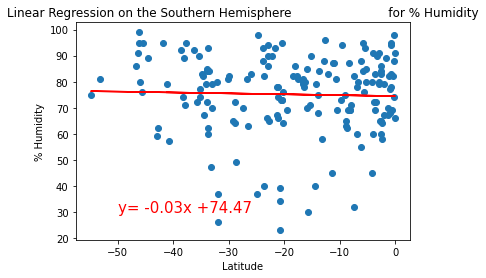

In [34]:
#Linear regression on the southern hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,30))

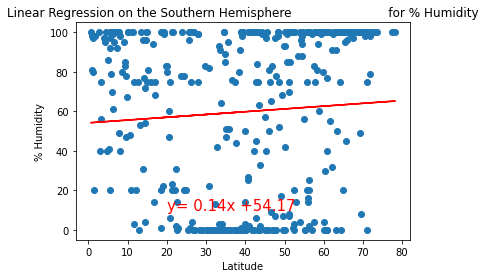

In [40]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Humidity',(20,10) )

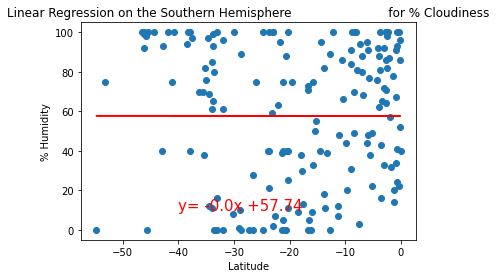

In [42]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Humidity',(-40,10) )

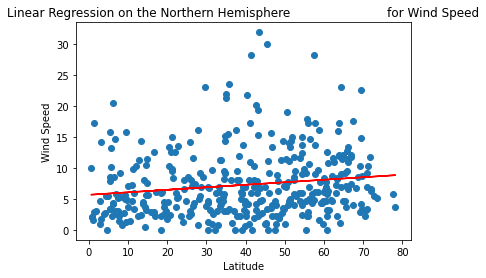

In [44]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

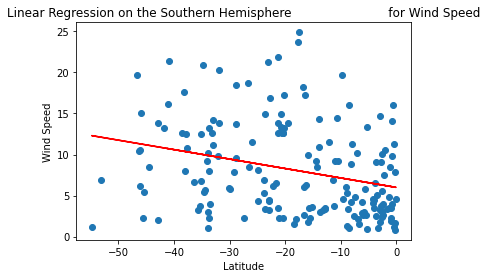

In [45]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))